<a href="https://colab.research.google.com/github/amjlak/gstat/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import stats
!pip install rasterio
import rasterio

In [ ]:

with rasterio.open('/content/LST.tif') as src1, rasterio.open('/content/NDVI.tif') as src2:
    raster1 = src1.read(1)
    raster2 = src2.read(1)


In [ ]:
raster1_flat = raster1.flatten()
raster2_flat = raster2.flatten()


In [ ]:
slope, intercept, r_value, p_value, std_err = [], [], [], [], []

for val1, val2 in zip(raster1_flat, raster2_flat):

    if not np.isnan(val1) and not np.isnan(val2):
        result = stats.linregress([val1], [val2])
        slope.append(result.slope)
        intercept.append(result.intercept)
        r_value.append(result.rvalue)
        p_value.append(result.pvalue)
        std_err.append(result.stderr)
    else:

        slope.append(np.nan)
        intercept.append(np.nan)
        r_value.append(np.nan)
        p_value.append(np.nan)
        std_err.append(np.nan)

In [ ]:
print(result)

LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=nan, stderr=nan, intercept_stderr=nan)


In [ ]:
slope_array = np.array(slope).reshape(raster1.shape)
intercept_array = np.array(intercept).reshape(raster1.shape)
r_value_array = np.array(r_value).reshape(raster1.shape)
p_value_array = np.array(p_value).reshape(raster1.shape)
std_err_array = np.array(std_err).reshape(raster1.shape)


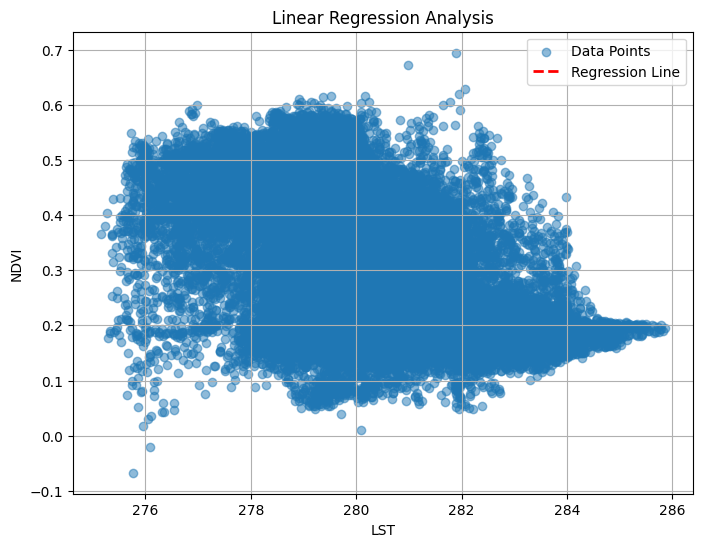

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(raster1_flat, raster2_flat, alpha=0.5, label='Data Points')
plt.xlabel('LST')
plt.ylabel('NDVI')

plt.plot(raster1_flat, slope * raster1_flat + intercept, color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.legend()
plt.title('Linear Regression Analysis')
plt.grid(True)
plt.show()

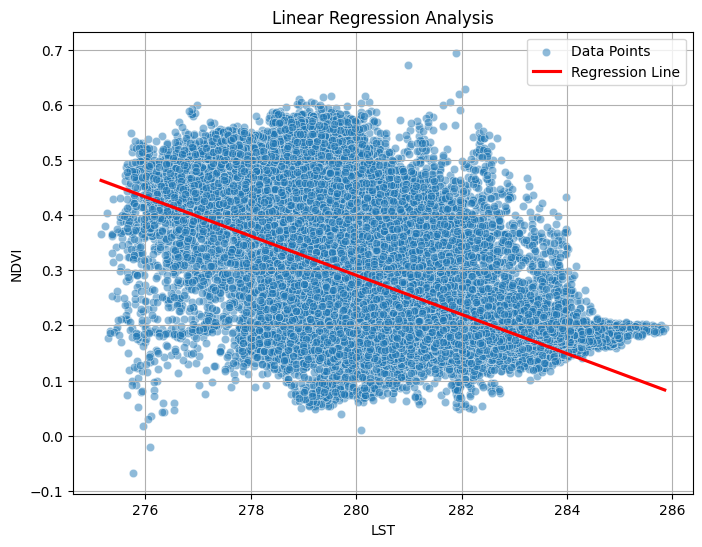

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x=raster1_flat, y=raster2_flat, alpha=0.5, label='Data Points')
sns.regplot(x=raster1_flat, y=raster2_flat, scatter=False, color='red', label='Regression Line')

plt.xlabel('LST')
plt.ylabel('NDVI')

plt.legend()
plt.title('Linear Regression Analysis')
plt.grid(True)
plt.show()


In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print("Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

Linear Regression Results:
Slope: 0.6000000000000001
Intercept: 2.1999999999999997
R-squared: 0.6000000000000002
P-value: 0.12402706265755442
Standard Error: 0.28284271247461895
